<a href="https://colab.research.google.com/github/Mikki797/Political-parties/blob/main/%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%823.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В блокноте делается та же классификация, что и в блокнотах 1 и 2, но с другим способом выбора гиперпараметров. Тут будут использоваться биграммы.

В качестве метрики выбрана balanced_accuracy_score. Хотелось бы, чтобы вместо того, чтобы предсказывать всегда один 0, классификаторы предказывали каждый из классов с вероятностью чуть больше чем 50%. Считаю, что эта метрика подходит для этого.

Для простоты копируем весь код загрузки данных из других блокнотов, но немного изменим подбор гиперпараметров, чтобы сократить его время.

In [ ]:
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Программы партий были предобработаны. Результат этого - папка с файлами вида "партия.txt", в каждом из которых написаны через пробел все слова-токены для соответствующей партии(они нормализованы и т.д.). Теперь будет создаваться мешок слов из программ партий.

# Создание датасетов

Делаем лист из текстов партий.

In [ ]:
input_dir = "/content/drive/MyDrive/Colab Notebooks/Проект/preprocess_parties"
party_names_txt = os.listdir(input_dir)
texts_for_vectorize = []
for i in party_names_txt:
  words = open(os.path.join(input_dir,i)).read() 
  texts_for_vectorize.append(words)

Делаем мешок слов.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(texts_for_vectorize)
print(vectorizer.get_feature_names())
print(X.toarray())

['covid', 'covid наложиться', 'covid охватывать', 'data', 'data российский', 'data создавать', 'data стратегически', 'industrial', 'industrial policies', 'policies', 'policies первоочередный', 'price', 'price сделать', 'publica', 'publica общий', 'абитуриент', 'абитуриент добровольный', 'абитуриент идти', 'абитуриент первый', 'аборт', 'аборт выплачивать', 'аборт оказывать', 'абсолют', 'абсолют принцип', 'абсолютизация', 'абсолютизация право', 'абсолютно', 'абсолютно безнаказанно', 'абсолютно беспрепятственно', 'абсолютно чуждый', 'абсолютный', 'абсолютный большинство', 'абсолютный величина', 'абсолютный меньшинство', 'абсолютный монархия', 'абсолютный обнищание', 'абсолютный правота', 'абсолютный приоритет', 'абсолютный прозрачность', 'абсолютный суверенитет', 'абстрактный', 'абстрактный экология', 'абсурд', 'абсурд человек', 'абхазия', 'абхазия приднестровье', 'авангард', 'авангард пролетарий', 'авангард рабочий', 'авангард экономика', 'авангардный', 'авангардный сила', 'авансцена', '

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Делаем датасет.

In [ ]:
import pandas as pd
party_names = [i.replace(".txt","").replace('й','й') for i in party_names_txt]

data_count = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_count

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,covid,covid наложиться,covid охватывать,data,data российский,data создавать,data стратегически,industrial,industrial policies,policies,policies первоочередный,price,price сделать,publica,publica общий,абитуриент,абитуриент добровольный,абитуриент идти,абитуриент первый,аборт,аборт выплачивать,аборт оказывать,абсолют,абсолют принцип,абсолютизация,абсолютизация право,абсолютно,абсолютно безнаказанно,абсолютно беспрепятственно,абсолютно чуждый,абсолютный,абсолютный большинство,абсолютный величина,абсолютный меньшинство,абсолютный монархия,абсолютный обнищание,абсолютный правота,абсолютный приоритет,абсолютный прозрачность,абсолютный суверенитет,...,языцех,языцех становиться,январь,январь индексация,япония,япония время,япония германия,япония корея,япония южный,японский,японский море,яркий,яркий пример,яркий свидетельство,ярко,ярко выраженный,ярко проявляться,ярмарка,ярмарка выходной,ярмарка гармонизировать,ярый,ярый сторонник,ясли,ясли детский,ясно,ясно выражать,ясно самый,ясный,ясный громкий,ясный перспектива,ясный реалистический,ясный четкий,яхта,яхта переполнять,яхта проч,яхта самолет,ячейка,ячейка обладать,ящик,ящик устанавливать
Партия прямой демократии,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Партия социальной защиты,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Партия прогресса,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Демократическая партия россии,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Партия пенсионеров,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
Российский общенародный союз,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,0,4,2,0,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,1,1,0,0,1,0,0,0,0
Партия дела,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Зеленые,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
Единая россия,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ПМБР,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Создаем аналогичные датасеты для tf и tf-idf.

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False)
tfidf_transformer = TfidfTransformer()
X_tf = tf_transformer.fit_transform(X)
X_tf_idf = tfidf_transformer.fit_transform(X)
data_tf = pd.DataFrame(X_tf.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_tf_idf = pd.DataFrame(X_tf_idf.toarray(),columns=vectorizer.get_feature_names(), index=party_names)
data_tf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,covid,covid наложиться,covid охватывать,data,data российский,data создавать,data стратегически,industrial,industrial policies,policies,policies первоочередный,price,price сделать,publica,publica общий,абитуриент,абитуриент добровольный,абитуриент идти,абитуриент первый,аборт,аборт выплачивать,аборт оказывать,абсолют,абсолют принцип,абсолютизация,абсолютизация право,абсолютно,абсолютно безнаказанно,абсолютно беспрепятственно,абсолютно чуждый,абсолютный,абсолютный большинство,абсолютный величина,абсолютный меньшинство,абсолютный монархия,абсолютный обнищание,абсолютный правота,абсолютный приоритет,абсолютный прозрачность,абсолютный суверенитет,...,языцех,языцех становиться,январь,январь индексация,япония,япония время,япония германия,япония корея,япония южный,японский,японский море,яркий,яркий пример,яркий свидетельство,ярко,ярко выраженный,ярко проявляться,ярмарка,ярмарка выходной,ярмарка гармонизировать,ярый,ярый сторонник,ясли,ясли детский,ясно,ясно выражать,ясно самый,ясный,ясный громкий,ясный перспектива,ясный реалистический,ясный четкий,яхта,яхта переполнять,яхта проч,яхта самолет,ячейка,ячейка обладать,ящик,ящик устанавливать
Партия прямой демократии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.01839,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия социальной защиты,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.030002,0.030002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия прогресса,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Демократическая партия россии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [ ]:
data_tf_idf

,covid,covid наложиться,covid охватывать,data,data российский,data создавать,data стратегически,industrial,industrial policies,policies,policies первоочередный,price,price сделать,publica,publica общий,абитуриент,абитуриент добровольный,абитуриент идти,абитуриент первый,аборт,аборт выплачивать,аборт оказывать,абсолют,абсолют принцип,абсолютизация,абсолютизация право,абсолютно,абсолютно безнаказанно,абсолютно беспрепятственно,абсолютно чуждый,абсолютный,абсолютный большинство,абсолютный величина,абсолютный меньшинство,абсолютный монархия,абсолютный обнищание,абсолютный правота,абсолютный приоритет,абсолютный прозрачность,абсолютный суверенитет,...,языцех,языцех становиться,январь,январь индексация,япония,япония время,япония германия,япония корея,япония южный,японский,японский море,яркий,яркий пример,яркий свидетельство,ярко,ярко выраженный,ярко проявляться,ярмарка,ярмарка выходной,ярмарка гармонизировать,ярый,ярый сторонник,ясли,ясли детский,ясно,ясно выражать,ясно самый,ясный,ясный громкий,ясный перспектива,ясный реалистический,ясный четкий,яхта,яхта переполнять,яхта проч,яхта самолет,ячейка,ячейка обладать,ящик,ящик устанавливать
Партия прямой демократии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.018426,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.030817,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия социальной защиты,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.047807,0.047807,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Партия прогресса,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Демократическая партия россии,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

Сохраняем датасеты.

In [ ]:
data_count.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый count.csv')
data_tf.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый tf.csv')
data_tf_idf.to_csv('drive/MyDrive/Colab Notebooks/Проект/Датасеты/Партии/Итоговый tf-idf.csv')

# Классификация

## Подготовка меток

Классификация делается по попаданию и не попаданию в Госдуму.

У нас есть файл csv, где для каждой партии указано, попадает она в Госдуму или нет. Загружаем его.

In [ ]:
project_dir = "/content/drive/MyDrive/Colab Notebooks/Проект"
labels_path = "партия попала или нет2.csv"
labels = pd.read_csv(os.path.join(project_dir,labels_path),header=None)
labels

,0,1,2
0,1,Власть народу,0
1,2,Гражданская инициатива,0
2,3,Гражданская платформа,0
3,4,Зеленая альтернатива,0
4,5,Зеленые,0
5,6,Коммунисты России,0
6,7,КПРФ,1
7,8,ЛДПР,1
8,9,Новые люди,1
9,10,Партия Возрождения России,0


Теперь нужно изменить порядок партий, чтобы он был, как в таблице данных.

In [ ]:
labels2 = pd.DataFrame({'Попала':list(labels[2])},index=list(labels[1]))

In [ ]:
y = [labels2['Попала'][i] for i in data_count.index]
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## K-neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

Посмотрим параметры классификатора.

In [ ]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

Делаем сетку параметров для подбора наилучших параметров. Для ускорения процесса ограничим набор используемых гиперпараметров до тех, которые я считаю целесообразными.

In [ ]:
possible_metrics = ['euclidean','manhattan']
param_grid1 = {'n_neighbors':range(1,8),'weights':['uniform','distance'],'algorithm':['auto'],'n_jobs': [-1],'metric':possible_metrics}
param_grid = [param_grid1]

Делаем поиск по сетке c использованием кросс-валидации. Так как у нас несбалансированные классы, попробуем StratifiedKFold. Он хорошо подходит, так как для k=5, в каждом тестовом наборе всегда будет ровно 1 партия, которая попала в Госдуму, так как партий 30, каждый fold по 6 партий, в Госдуму попали 5 партий, и как раз по одной будет на каждый из 5 кросс-валидаций.

In [ ]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1,scoring='balanced_accuracy',cv=StratifiedKFold())
gs.fit(data_count,y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid=[{'algorithm': ['auto'],
                          'metric': ['euclidean', 'manhattan'], 'n_jobs': [-1],
                          'n_neighbors': range(1, 8),
                          'weights': ['uniform', 'distance']}],
             scoring='balanced_accuracy')

Смотрим лучшие найденные параметры.

In [ ]:
gs.best_params_

{'algorithm': 'auto',
 'metric': 'euclidean',
 'n_jobs': -1,
 'n_neighbors': 1,
 'weights': 'uniform'}

Смотрим точность, полученную на лучших параметрах, в результате оценки с помощью кросс-валидации.

In [ ]:
gs.best_score_

0.58

Попробуем то же самое для tf и tf-idf

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1,scoring='balanced_accuracy',cv=StratifiedKFold())
gs.fit(data_tf,y)
print(gs.best_params_)
gs.best_score_

{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}


0.5599999999999999

In [ ]:
from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(estimator = KNeighborsClassifier(),param_grid=param_grid,n_jobs = -1,scoring='balanced_accuracy',cv=StratifiedKFold())
gs.fit(data_tf_idf,y)
print(gs.best_params_)
gs.best_score_

{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}


0.5599999999999999

## Наивный Баес

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score

Строим модели и смотрим их точности с помощью кросс валидации. Чтобы можно было провести достаточно много итераций, используем StratifiedShuffleSplit, который позволяет задавать число итераций.

In [ ]:
for data in [data_count,data_tf,data_tf_idf]:
  nb = GaussianNB()
  print(cross_val_score(nb,data,y,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50)).mean())

0.5
0.5
0.5


In [ ]:
for data in [data_count,data_tf,data_tf_idf]:
  nb = MultinomialNB()
  print(cross_val_score(nb,data,y,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50)).mean())

0.503
0.5
0.5


In [ ]:
for data in [data_count,data_tf,data_tf_idf]:
  nb = BernoulliNB()
  print(cross_val_score(nb,data,y,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50)).mean())

0.5
0.5
0.5


Классификаторы с такой точностью бесполезны.

## Деревья решений

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from scipy.sparse import csc_matrix
from sklearn.model_selection import GridSearchCV
import numpy as np

Делаем сетку параметров для подбора наилучших параметров, и делаем поиск по сетке, чтобы найти наилучший параметр. Перед fit делаем преобразование датасета в формат csc_matrix, чтобы fit делался быстрее.

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1,scoring='balanced_accuracy',cv=StratifiedKFold())
gs.fit(data_count,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.45999999999999996


{'max_depth': 9, 'min_samples_split': 5}

Строим получившееся дерево.

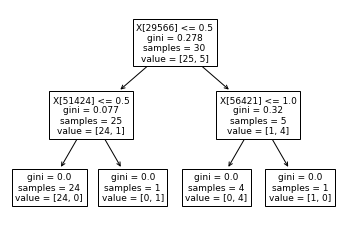

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

value - Это распределение по классам примеров, которые попали в этот узел.

Построим классификатор также для tf и tf-idf.

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1,scoring='balanced_accuracy',cv=StratifiedKFold())
gs.fit(data_tf,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.62


{'max_depth': 3, 'min_samples_split': 4}

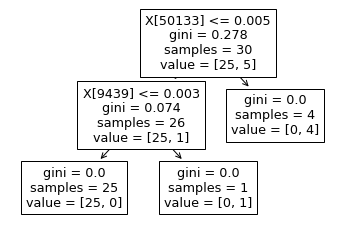

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

Посмотрим, что за переменные, которые смотрятся в узлах дерева.

In [ ]:
print(data_count.columns[50133],'|',data_count.columns[9439])

свалка | граница российский


In [ ]:
print(data_tf['свалка'])

Партия прямой демократии           0.000000
Партия социальной защиты           0.000000
Партия прогресса                   0.000000
Демократическая партия россии      0.000000
Партия пенсионеров                 0.000000
Российский общенародный союз       0.000000
Партия дела                        0.000000
Зеленые                            0.000000
Единая россия                      0.006581
ПМБР                               0.000000
Справедливая россия                0.019996
Новые люди                         0.005566
Зеленая альтернатива               0.000000
Партия Возрождения России          0.000000
Гражданская инициатива             0.000000
Власть народу                      0.000000
Казачья партия                     0.000000
ЛДПР                               0.023717
Партия народной свободы            0.000000
КПРФ                               0.000000
Партия Социалистического Выбора    0.000000
Родина                             0.000000
Яблоко                          

Правило, которое выдает классификатор, определяется так:если в партии есть достаточно часто, относительно других слов, есть слово "свалка", то партия попадает в Госдуму. Иначе она не попадает, за одним исключением: если у нее есть что то о Российских границах, то попадает.

In [ ]:
param_grid = [{'max_depth':range(1,10),'min_samples_split':range(2,10)}]
gs = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=param_grid,n_jobs=-1,scoring='balanced_accuracy',cv=StratifiedKFold())
gs.fit(data_tf_idf,y)
print(gs.best_score_)
tree_params = gs.best_params_
tree_params

0.5399999999999999


{'max_depth': 2, 'min_samples_split': 5}

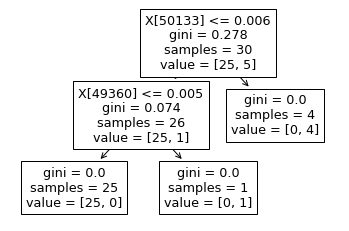

In [ ]:
from sklearn import tree
proba = tree.plot_tree(gs.best_estimator_)

Этот классификатор работает чуть хуже, но видно, что слово "свалка" тут тоже в корне дерева. Надо заметить, что больше всего о свалках говорит Единая Россия - возможно это обеспечило ей большинство в Госдуме(но очень маловероятно).

## SVM

In [ ]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

Строим модель методом опорных векторов для линейного ядра и оцениваем ее точность на кросс валидации.

In [ ]:
lin_svm = svm.LinearSVC()
print(cross_val_score(lin_svm,data_count,y,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50)).mean(),
      cross_val_score(lin_svm,data_tf,y,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50)).mean(),
      cross_val_score(lin_svm,data_tf_idf,y,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50)).mean())

0.5059999999999999 0.5 0.5


То же самое делаем для других ядер.

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50))
gs.fit(data_count,y)
print('best score: ',gs.best_score_)
gs.best_params_

best score:  0.5


{'kernel': 'rbf'}

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50))
gs.fit(data_tf,y)
print('best score: ',gs.best_score_)
gs.best_params_

best score:  0.5


{'kernel': 'rbf'}

In [ ]:
svm_est = svm.SVC()
param_grid = [{'kernel':['rbf','sigmoid']}]
gs = GridSearchCV(svm_est,param_grid=param_grid,n_jobs=-1,scoring='balanced_accuracy',cv=StratifiedShuffleSplit(train_size=6,n_splits=50))
gs.fit(data_tf_idf,y)
print('best score: ',gs.best_score_)
gs.best_params_

best score:  0.5


{'kernel': 'rbf'}

Метод опорных векторов оказался бесполезен.

# Оценка моделей

Сначала попробуем сделать разделение на тестовые и тренировочные наборы.

In [ ]:
from sklearn.model_selection import train_test_split
split = [train_test_split(i, y, test_size=0.2, random_state=16) for i in [data_count,data_tf,data_tf_idf]]
#X_train_count, X_test_count, y_train_count, y_test_count = train_test_split(data_count, y, test_size=0.2, random_state=2)
#X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(data_tf, y, test_size=0.2, random_state=2)
#X_train_tf_idf, X_test_tf_idf, y_train_tf_idf, y_test_tf_idf = train_test_split(data_tf_idf, y, test_size=0.2, random_state=2)

В результате поисков по сетке были определены лучшие параметры для классификаторов. Выберем те, которые работают лучше чем случайный выбор. Пусть это будут те, у которых точность больше 51%.

In [ ]:
knn_count = KNeighborsClassifier(**{'algorithm': 'auto','metric': 'euclidean','n_jobs': -1,'n_neighbors': 1,'weights': 'uniform'})
knn_tf = KNeighborsClassifier(**{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'})
knn_tf_idf = KNeighborsClassifier(**{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'uniform'})

tree_tf = DecisionTreeClassifier(max_depth=3,min_samples_split=4)
tree_tf_idf = DecisionTreeClassifier(max_depth=2,min_samples_split=5)

classif_count = [knn_count]
classif_tf = [knn_tf,tree_tf]
classif_tf_idf = [knn_tf_idf,tree_tf_idf]
classif = [classif_count,classif_tf,classif_tf_idf]

Определим y_true и y_pred.

In [ ]:
y_pred = []
y_true = []
for i in range(len(classif)):
  for j in classif[i]:
    y_pred_tmp = j.fit(split[i][0],split[i][2]).predict(split[i][1])
    y_pred.append(y_pred_tmp)
    y_true.append(split[i][3])

In [ ]:
y_true

[[0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 1]]

In [ ]:
y_pred

[array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0])]

Выполним этот процесс несколько раз.

In [ ]:
for rand in range(1,15):
  split = [train_test_split(i, y, test_size=0.2, random_state=rand) for i in [data_count,data_tf,data_tf_idf]]
  knn_count = KNeighborsClassifier(**{'algorithm': 'auto','metric': 'euclidean','n_jobs': -1,'n_neighbors': 1,'weights': 'uniform'})
  knn_tf = KNeighborsClassifier(**{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'})
  knn_tf_idf = KNeighborsClassifier(**{'algorithm': 'auto', 'metric': 'euclidean', 'n_jobs': -1, 'n_neighbors': 4, 'weights': 'uniform'})

  tree_tf = DecisionTreeClassifier(max_depth=3,min_samples_split=4)
  tree_tf_idf = DecisionTreeClassifier(max_depth=2,min_samples_split=5)

  classif_count = [knn_count]
  classif_tf = [knn_tf,tree_tf]
  classif_tf_idf = [knn_tf_idf,tree_tf_idf]
  classif = [classif_count,classif_tf,classif_tf_idf]

  y_pred = []
  y_true = []
  for i in range(len(classif)):
    for j in classif[i]:
      y_pred_tmp = j.fit(split[i][0],split[i][2]).predict(split[i][1])
      y_pred.append(y_pred_tmp)
      y_true.append(split[i][3])
  for x in range(len(y_true)):
    print(y_pred[x],y_true[x])
  print()

[0 0 0 0 0 0] [1, 0, 1, 1, 0, 0]
[1 0 0 0 0 0] [1, 0, 1, 1, 0, 0]
[0 0 0 0 0 0] [1, 0, 1, 1, 0, 0]
[0 0 0 0 0 0] [1, 0, 1, 1, 0, 0]
[0 0 0 0 0 0] [1, 0, 1, 1, 0, 0]

[0 0 0 0 0 0] [0, 0, 0, 0, 0, 1]
[1 0 0 0 0 0] [0, 0, 0, 0, 0, 1]
[0 0 0 0 0 0] [0, 0, 0, 0, 0, 1]
[0 0 0 0 0 0] [0, 0, 0, 0, 0, 1]
[0 0 0 0 0 0] [0, 0, 0, 0, 0, 1]

[0 0 0 0 0 0] [0, 0, 0, 0, 0, 0]
[0 0 1 0 0 0] [0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0] [0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0] [0, 0, 0, 0, 0, 0]
[0 0 0 0 0 0] [0, 0, 0, 0, 0, 0]

[0 0 1 0 0 0] [1, 0, 0, 0, 0, 0]
[0 0 1 0 0 0] [1, 0, 0, 0, 0, 0]
[0 0 0 0 0 0] [1, 0, 0, 0, 0, 0]
[0 0 0 0 0 0] [1, 0, 0, 0, 0, 0]
[0 0 0 0 0 0] [1, 0, 0, 0, 0, 0]

[0 1 0 0 0 0] [1, 0, 0, 0, 0, 1]
[0 1 0 0 0 0] [1, 0, 0, 0, 0, 1]
[1 1 0 0 0 0] [1, 0, 0, 0, 0, 1]
[0 0 0 0 0 0] [1, 0, 0, 0, 0, 1]
[1 1 0 0 0 0] [1, 0, 0, 0, 0, 1]

[0 1 0 0 1 0] [0, 0, 0, 0, 1, 1]
[0 1 0 0 1 0] [0, 0, 0, 0, 1, 1]
[0 1 0 0 0 0] [0, 0, 0, 0, 1, 1]
[0 0 0 0 0 0] [0, 0, 0, 0, 1, 1]
[0 0 0 0 1 0] [0, 0, 0, 0, 1, 1]

[0 1

Видно, что, несмотря на то, что была выбрана другая метрика для выбора гиперпараметров моделей (balanced accuracy), классификаторы продолжают отдавать предпочтение классифицированию всего как 0, и неправильному классифицированию 1.

## Выводы

Было опробованы методы машинного обучения: knn, Наивный Баес, Деревья решений, SVM для классификации, попала ли в Госдуму партия. Их гиперпараметры подбирались сначала по точности для 1-грамм и биграмм, а затем по сбалансированной точности для биграмм. Они показали точность и балансированную точность, почти не отличающуюся от случайного выбора преобладающего класса 0.

3 из 4 используемых методов машинного обучения работают, если примеры, попадающие в один класс, находятся рядом. Но кластеризация показала, что партии, попадающие в Госдуму, обычно находятся в разных кластерах, и таким образом не находятся рядом, что обьясняет плохую работу методов машинного обучения в этой задаче.
Кластеризация показала близость некоторых партий, которые в целом говорят об одном и том же, например КПРФ и Коммунисты России, но те, хоть и говорят в целом об одном, имеют разные результаты по попаданию в Думу.

Таким образом, попадание партии в Госдуму крайне слабо связано с текстом программы партии.